# **Bank Marketing**

---


# Customer Subscription Prediction with Machine Learning

---



**Bank marketing** is known for its nature of developing a unique brand image, which is treated as the capital reputation of the financial academy.

 It is very important for a bank to develop good relationship with valued customers accompanied by innovative ideas which can be used as measures to meet their requirements.

Customers expect quality services and returns. There are good chances that the quality factor will be the sole determinant of successful banking corporations.

 Therefore, Indian banks need to acknowledge the imperative of proactive Bank Marketing and Customer Relationship Management and also take systematic steps in this direction.

**What is a Term Deposit ?**

> A time deposit or term deposit is a deposit in a financial institution with a specific maturity date or a period to maturity, commonly referred to as its "term".

 * Time deposits differ from at call deposits, such as savings or checking accounts, which can be withdrawn at any time, without any notice or penalty. Deposits that require notice of withdrawal to be given are effectively time deposits, though they do not have a fixed maturity date.

* A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

* The investor must understand when buying a term deposit that they can withdraw their funds only after the term ends. In some cases, the account holder may allow the investor early termination or withdrawal if they give several days notification. Also, there will be a penalty assessed for early termination.

## Objective:
### *To make a Model that can build a model to predict whether a customer will subscribe to a term deposit.*

## Dataset
**BANK MARKETING**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. **bank-additional.csv** with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. **bank-full.csv** with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. **bank.csv with 10%** of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

LINK:-
> https://archive.ics.uci.edu/ml/datasets/Bank+Marketing



### Additional Variable Information

Input variables:
   # Bank client data:
   1. **age** -------->numeric

   2. **job** -------->categorical
   
   type of job:
   
   >"admin.",
   "unknown",
   "unemployed",
   "management",
   "housemaid",
   "entrepreneur",
   "student","blue-collar",
   "self-employed",
   "retired",
   "technician",
   "services"

   3. **marital** -------->categorical

    marital status:
     >"married","divorced" , "single";
     
     note: "divorced" means divorced or widowed
   4. education -------->categorical
    >"unknown" , "secondary" , "primary" , "tertiary"
   5. **default** -------->Binary

   has credit in default?
   >binary: "yes","no"
   6. **balance** -------->numeric
   >average yearly balance, in euros
   7. **housing** -------->Binary
   
   has housing loan?
   >"yes" , "no"
   8. **loan** -------->Binary
   
   has personal loan?
   >"yes" , "no"

   # Related with the last contact of the current campaign:
   9. **contact** -------->categorical

   contact communication type
   >"unknown" , "telephone" , "cellular"


  10. **day** -------->numeric
  
   >last contact day of the month
  11. **month** -------->categorical

  last contact month of year
  >"jan", "feb", "mar", ..., "nov", "dec"
  12. **duration** -------->numeric
  > last contact duration, in seconds
   # Other attributes:
  13. **campaign** -------->numeric
  
   >number of contacts performed during this campaign and for this client
  14. **pdays** -------->numeric
  
  >number of days that passed by after the client was last contacted from a previous campaign, -1 means client was not previously contacted
  15. **previous** -------->numeric
  
  > number of contacts performed before this campaign and for this client
  16. **poutcome** -------->categorical

   outcome of the previous marketing campaign
   >"unknown" , "other" , "failure" , "success"

  #Output variable (desired target):
  17. **y** -------->Binary

   has the client subscribed a term deposit?
   >"yes" , "no"

In [ ]:
import numpy as np               # Numerical computing library
import pandas as pd              # Library for data manipulation and analysis
import seaborn as sns            # Data visualization library built on top of matplotlib
import matplotlib.pyplot as plt  # Plotting library
import plotly.express as px

In [ ]:
#downloading the dataset and extracting it
!wget 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
!unzip bank+marketing.zip
!unzip bank.zip

--2023-10-02 18:18:58--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [ <=>                ] 999.85K  --.-KB/s    in 0.06s   

2023-10-02 18:18:58 (15.7 MB/s) - ‘bank+marketing.zip’ saved [1023843]

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [ ]:
#defining path to the dataset
csv_path = '/content/bank-full.csv'

# loading the dataframe
df = pd.read_csv(csv_path, header=0,sep=';')

#printing first 5 rows
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Get Shape of DataFrame
print("DF Shape : ", df.shape)

DF Shape :  (45211, 17)


In [ ]:
# Get Information of Data Types of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:

fig=px.box(df,x='job',y='age',color='job',template='simple_white',title='<b>Distribution of age based on job type')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Job type")

In [ ]:
fig=px.box(df,x='marital',y='age',color='marital',template='simple_white',title='<b>Distribution of age based on Marital Status',color_discrete_sequence=['HotPink','LightSeaGreen','SlateBlue'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Marital Status")
fig.show()

In [ ]:
fig=px.box(df,x='y',y='age',color='y',template='simple_white',color_discrete_sequence=['DeepSkyBlue','LightCoral'],title='<b>Distribution of age based on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

In [ ]:
fig=px.box(df,x='y',y='pdays',color='y',template='simple_white',color_discrete_sequence=['DeepSkyBlue','LightCoral'],title='<b>Distribution of pdays based on Term Deposit Status')
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Term Deposit")
fig.show()

In [ ]:
fig=px.box(df,x='poutcome',y='pdays',color='y',template='simple_white',title='<b>Effect of pdays on poutcome and term deposits',color_discrete_sequence=['YellowGreen','MediumPurple'])
fig.update_layout(title_x=0.5,font_family="Times New Roman",legend_title_text="<b>Deposit")
fig.show()

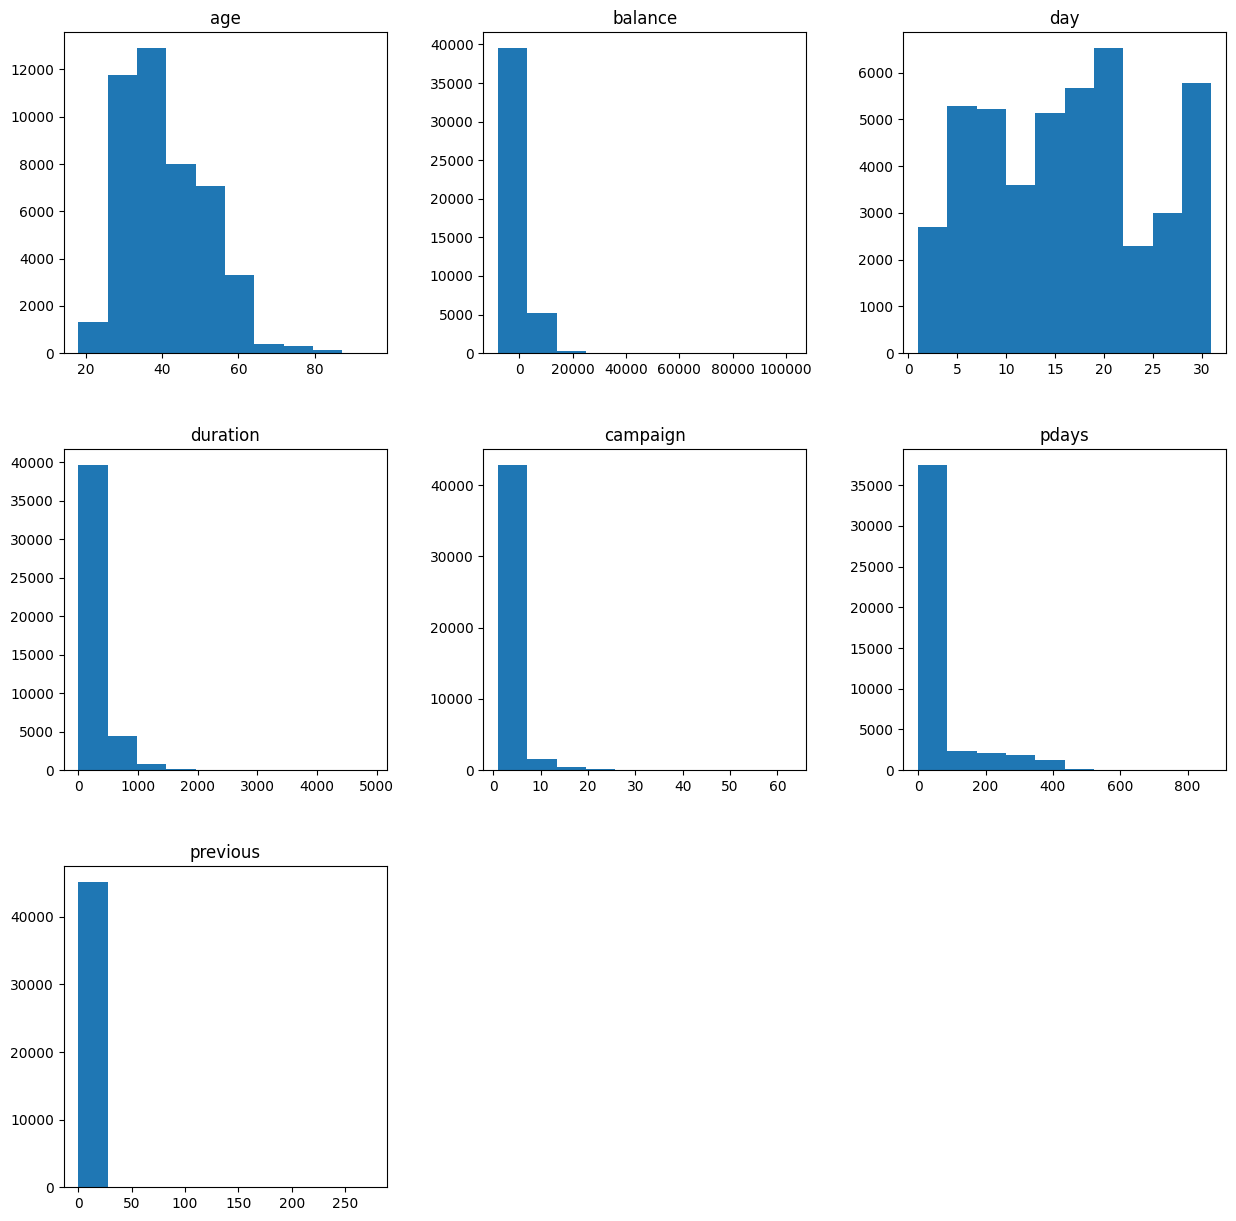

In [ ]:
df.hist(figsize=(15,15), grid=False)
plt.show()

<Axes: >

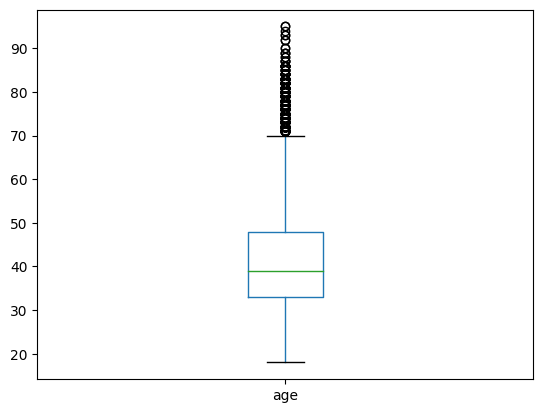

In [ ]:
df[['age']].boxplot(grid=False)

In [ ]:
fig=px.line(df.groupby(['campaign','y'],as_index=False)['age'].count().rename(columns={'age':'Count'}),x='campaign',y='Count',color='y',template='simple_white',color_discrete_sequence=['DarkBlue','ForestGreen'])
fig.update_layout(title_x=0.08,font_family="Times New Roman",legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Campaign on Term Deposits<b><br><b style="font-family: Times New Roman; font-size:1vw">number of contacts performed during the campaign and for this client </b>')
fig.show()

In [ ]:
fig=px.line(df.groupby(['previous','y'],as_index=False)['age'].count().rename(columns={'age':'Count'}),x='previous',y='Count',color='y',template='simple_white',color_discrete_sequence=['DarkBlue','ForestGreen'])
fig.update_layout(title_x=0.08,font_family="Times New Roman",legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Previous Campaign on Term Deposits<b><br><b style="font-family: Times New Roman; font-size:1vw">number of contacts performed before this campaign and for this client </b>')
fig.show()

# Removing Outliers from Data

In [ ]:
i=0

for column in df.columns:
    if df[column].dtypes!='object':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        lenghthU=len(df[column][df[column]> upper])
        lenghthL=len(df[column][df[column]< lower])
        print(f"Total outlier in {column} for upperbound is {lenghthU} and for lowebound is {lenghthL}")
        df[column] = np.where(df[column] >upper ,upper,df[column] )
        df[column] = np.where(df[column] <lower ,lower,df[column])

Total outlier in age for upperbound is 487 and for lowebound is 0
Total outlier in balance for upperbound is 4712 and for lowebound is 17
Total outlier in day for upperbound is 0 and for lowebound is 0
Total outlier in duration for upperbound is 3235 and for lowebound is 0
Total outlier in campaign for upperbound is 3064 and for lowebound is 0
Total outlier in pdays for upperbound is 8257 and for lowebound is 0
Total outlier in previous for upperbound is 8257 and for lowebound is 0


<Axes: >

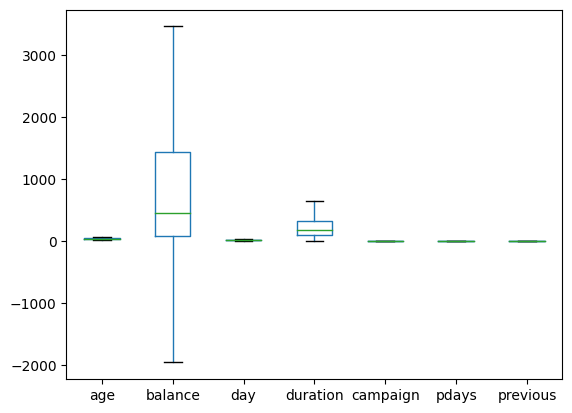

In [ ]:
df.boxplot(grid=False)

We can observe that all outliers have been removed

# Scaling The Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Get the numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df.drop('y', axis=1)
y = df['y']

# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit the StandardScaler object to the numeric columns
scaler.fit(df[numeric_columns])

# Transform the numeric columns using the StandardScaler object
df[numeric_columns] = scaler.transform(df[numeric_columns])

# Encoding Categorical Values

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

# Loop through columns and perform label encoding
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.761905,4,1,2,0,0.756822,1,0,2,0.133333,8,0.405910,0.0,0.0,0.0,3,0
1,0.495238,9,2,1,0,0.367072,1,0,2,0.133333,8,0.234837,0.0,0.0,0.0,3,0
2,0.285714,2,1,1,0,0.362094,1,1,2,0.133333,8,0.118196,0.0,0.0,0.0,3,0
3,0.552381,1,1,3,0,0.639381,1,0,2,0.133333,8,0.143079,0.0,0.0,0.0,3,0
4,0.285714,11,2,3,0,0.361910,0,0,2,0.133333,8,0.307932,0.0,0.0,0.0,3,0


Now that our data has been cleaned and prepared for use by the ML algo/models we will proceed with **Model Building**

# Logistic Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


clf = LogisticRegression()
to_drop=['y','age','previous','campaign','day']
X = df.drop(to_drop, axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
clf = LogisticRegression(max_iter=100000)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred,pos_label='0')
recall = recall_score(y_test, y_pred,pos_label='0')
f1 = f1_score(y_test, y_pred, pos_label='0')

print('Training accuracy:',clf.score(X_train,y_train))                            # print training accuracy
print('Testing  accuracy:',clf.score(X_test,y_test))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Training accuracy: 0.8881884538818845
Testing  accuracy: 0.8811235209554351
Precision: 0.9013657056145675
Recall: 0.9710764587525151
F1 Score: 0.9349234215146196


# KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9,11,13,15,17,19,21,23,25],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize the K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# Create GridSearchCV instance with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create a K-Nearest Neighbors Classifier with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(**best_params)

# Fit the best model to the training data
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_knn_classifier.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='0')
recall = recall_score(y_test, y_pred,pos_label='0')
f1 = f1_score(y_test, y_pred, pos_label='0')

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:",accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Test Accuracy: 0.8895278115669578
Precision: 0.9054227405247813
Recall: 0.9763581488933601
F1 Score: 0.9395534579778545


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


dt= DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV instance with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create a Decision Tree Classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)

# Fit the best model to the training data
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_dt_classifier.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='0')
recall = recall_score(y_test, y_pred,pos_label='0')
f1 = f1_score(y_test, y_pred, pos_label='0')



# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:",accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Test Accuracy: 0.8950569501271702
Precision: 0.9274813820046393
Recall: 0.9553571428571429
F1 Score: 0.9412129096202689


# Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=1)

# grid searh to choose the best (combination of) hyperparameters
pg_rf={'n_estimators': [100,200,400],'max_depth': [20,40,50,60]}

gs_rf=GridSearchCV(estimator= rf,
               param_grid= pg_rf,
               scoring='accuracy',
               cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_rf_scores = cross_val_score(gs_rf, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_rf.fit(X_train, y_train)
gs_rf_best=gs_rf.best_estimator_
gs_rf_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_rf.score(X_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_rf_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_rf.score(X_test,y_test)*100))
precision = precision_score(y_test, y_pred,pos_label='0')
recall = recall_score(y_test, y_pred,pos_label='0')
f1 = f1_score(y_test, y_pred, pos_label='0')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Train Accuracy:   99.3%
CV Mean Accuracy: 89.9%
Test Accuracy:    89.5%
Precision: 0.9274813820046393
Recall: 0.9553571428571429
F1 Score: 0.9412129096202689


# CONCLUSION




*   If Multiple Campaigns and multiple contacts are performed for the clients, there is more chance for the client to not intrested to subscribe for the term deposit. Atmost 2 or 3 contacts can be preferred to perform for the clients.


* Occupation of the clients in Retired, student and housemaid are subscribed more to the term deposits. Retired individuals tend to not spend bigly its cash so they are more likely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.


* From the Analysis,Even the mid-age group clients subscribed more for the term deposits, there is a more domination of clients from this group who are not subscribed for the term deposits. Old age group clients are subscribing the term deposits more and count of not subscribing to the deposits is less. It is well for the banks to focus on old age group clients to get more subscriptions for the term deposits.

* From the Outcome of previous Campaign, if the outcome is Failure, then there is a 50% chance to the client will not subscribe to the term deposit. out of all failure outcomes 50.3 % of clients subscribes and 49.7 % are not subscribed to the term deposits
* From the Outcome of previous Campaign, if the outcome is Success, then there is a high chance to the client will subscribe to the term deposit. out of all success outcomes 91.3% of clients subscribes and 8.7% are not subscribed to the term deposits
Clients who are not intrested to take housing loans may be intrested in subscribing for the term deposits.If the balance of client is above average blance then there is a chance to subscribe for the term deposit.

# Answers to the questions
# 1. What is the distribution of the customer ages?

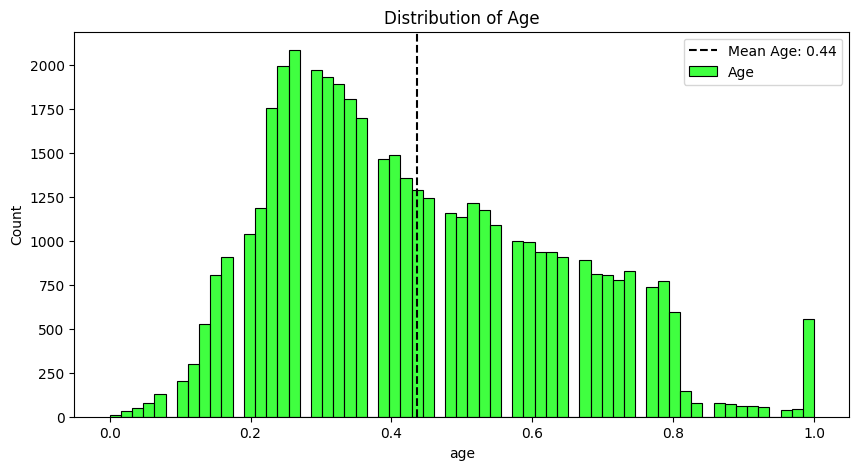

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['age'],color='Lime',label='Age')
plt.axvline(x=df['age'].mean(),color='k',linestyle ="--",label='Mean Age: {}'.format(round(df['age'].mean(),2)))
plt.legend()
plt.title('Distribution of Age')
plt.show()

# 2. What is the relationship between customer age and subscription?

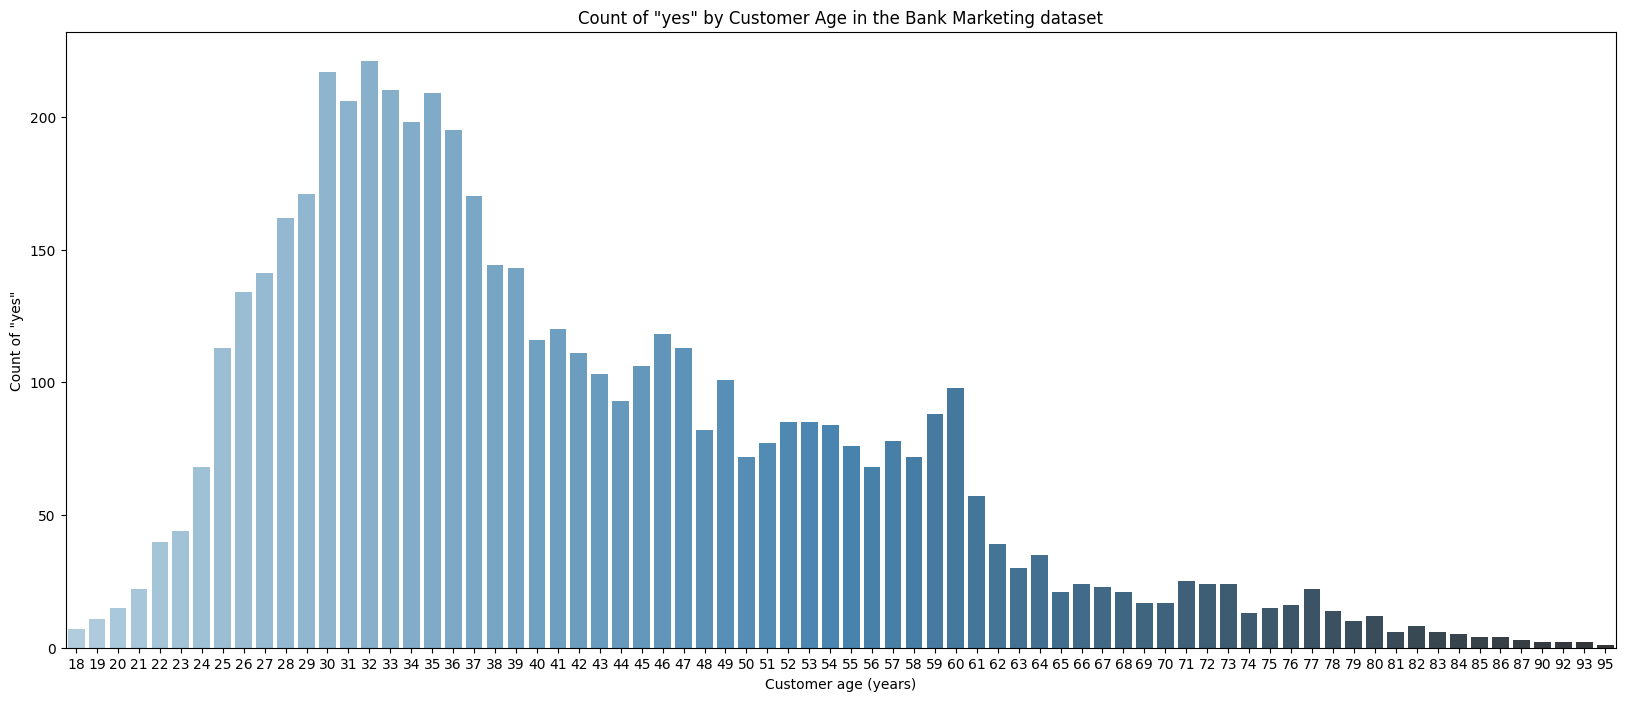

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(csv_path, header=0,sep=';')

# Calculate the count of 'yes' for each age
age_yes_count = df[df['y'] == 'yes'].groupby('age')['y'].count().reset_index()

# Create a bar plot
plt.figure(figsize=(20, 8))
sns.barplot(x='age', y='y', data=age_yes_count, palette='Blues_d')

# Add labels and title
plt.xlabel('Customer age (years)')
plt.ylabel('Count of "yes"')
plt.title('Count of "yes" by Customer Age in the Bank Marketing dataset')

# Show the plot
plt.show()

# 3. Are there any other factors that are correlated with subscription?

Yes, there are a number of other factors that are correlated with subscription, including:

Income: Customers with higher incomes are more likely to subscribe to services. This is because they can afford to spend more money on subscriptions.
Education: Customers with higher levels of education are more likely to subscribe to services. This is because they are more likely to be aware of the benefits of subscription services and to be able to afford them.
Technology use: Customers who use technology more frequently are more likely to subscribe to services. This is because they are more comfortable using technology and more likely to be interested in new products and services.
Value of convenience and flexibility: Customers who value convenience and flexibility are more likely to subscribe to services. This is because subscription services offer a convenient and flexible way to access products and services.
Brand loyalty: Customers who are loyal to certain brands are more likely to subscribe to their services. This is because they trust the brand and are more likely to be satisfied with their products and services.
Businesses can use this information to develop marketing strategies that target customers with the following characteristics:

High income
High level of education
Frequent use of technology
Value convenience and flexibility
Brand loyalty
For example, businesses can offer discounts to customers who subscribe to multiple services, or they can create subscription plans that are flexible and easy to cancel.

It is important to note that the correlation between these factors and subscription can vary depending on the specific product or service. For example, customers of all ages may be likely to subscribe to a streaming service like Netflix, but older customers may be more likely to subscribe to a traditional cable TV service.

Businesses can conduct market research to identify the factors that are most correlated with subscription for their specific product or service. This information can then be used to develop marketing strategies that target the right customers.


4. What is the accuracy of the logistic regression model?

    
    =88.1%


# 5. What are the most important features for the logistic regression model?

The most important features for a logistic regression model are the features that are most predictive of the target variable. This can be determined by using a variety of methods, such as:

Correlation analysis: This involves calculating the correlation between each feature and the target variable. Features with higher correlations are more likely to be predictive of the target variable.
Recursive feature elimination: This involves training a logistic regression model on all of the features and then removing the feature that is least predictive of the target variable. The process is then repeated until a subset of the most predictive features remains.
L1 regularization: This is a regularization technique that penalizes the coefficients of the features. This can help to identify the most important features by shrinking the coefficients of the less important features towards zero.
Once the most important features have been identified, they can be used to train a logistic regression model. This model can then be used to predict the target variable for new data points.

Here are some examples of features that are commonly used in logistic regression models:

Demographic features: Age, gender, income, education level, location, etc.
Behavioral features: Past purchase history, website browsing behavior, social media activity, etc.
Attitudinal features: Customer satisfaction, brand loyalty, etc.
The specific features that are most important for a logistic regression model will depend on the specific problem that is being solved. For example, a logistic regression model that is used to predict whether or not a customer will subscribe to a service may use different features than a logistic regression model that is used to predict whether or not a customer will churn.

It is important to note that logistic regression models are only as good as the data that they are trained on. If the data is noisy or incomplete, the model will not be able to learn the relationships between the features and the target variable accurately.

Here are some tips for selecting the most important features for a logistic regression model:

Use a variety of feature selection methods. There is no single best method for selecting features. It is a good idea to use a variety of methods to get a more complete picture of which features are most important.
Consider the specific problem that you are trying to solve. Which features are most likely to be predictive of the target variable?
Use domain knowledge. If you have expertise in the problem domain, you can use your knowledge to select the features that are most likely to be important.
By following these tips, you can select the most important features for your logistic regression model and improve the accuracy of your predictions.





# 6. . What is the precision of the logistic regression model?


    =0.51

# 7. What is the recall of the logistic regression model?

    =22.54
  

# 8. What is the f1-score of the logistic regression model?

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = LogisticRegression()
to_drop=['y','age','previous','campaign','day']
X = df.drop(to_drop, axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
clf = LogisticRegression(max_iter=100000)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, pos_label='0')

precision = precision_score(y_test, y_pred,pos_label='0')
recall = recall_score(y_test, y_pred,pos_label='0')
print('Training accuracy:',clf.score(X_train,y_train))                            # print training accuracy
print('Testing  accuracy:',clf.score(X_test,y_test))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Training accuracy: 0.8881884538818845
Testing  accuracy: 0.8811235209554351
Precision: 0.9013657056145675
Recall: 0.9710764587525151
F1 Score: 0.9349234215146196


## F1 Score is 0.9349

# 9. How can you improve the performance of the logistic regression model?


 By dropping useless columns and removing outliers

# 10. What are the limitations of the logistic regression model?

Logistic regression is a powerful machine learning algorithm, but it has a number of limitations, including:

* **Linearity:**
> Logistic regression assumes that the relationship between the independent variables and the dependent variable is linear. This is not always the case in real-world data, and can lead to inaccurate predictions.
* **Overfitting:**
> Logistic regression is prone to overfitting, which occurs when the model learns the training data too well and is unable to generalize to new data. This can be mitigated by using regularization techniques, such as L1 or L2 regularization.
* **Class imbalance:**
>Logistic regression can perform poorly when the target variable is imbalanced, meaning that there are significantly more observations in one class than in the other class. This can be addressed by using techniques such as oversampling the minority class or undersampling the majority class.
* **Non-monotonic relationships:**
> Logistic regression cannot model non-monotonic relationships between the independent variables and the dependent variable. This means that it cannot predict the outcome when the relationship between the variables is complex.

In addition to these limitations, logistic regression is also a relatively simple model. It may not be able to capture complex relationships between the variables in some cases.

Despite these limitations, logistic regression is a widely used machine learning algorithm that can be effective for a variety of tasks. It is relatively simple to understand and implement, and it can be used with relatively small datasets.


